In [9]:
import numpy as np
from typing import Callable, Tuple, Iterable, Optional
from matplotlib import pyplot as plt

# Trabalho 2

In [10]:
def eulerexplicit(f: Callable[[float, float], float], y0: float, ts: Iterable[float]):
    """
    Solves the ODE of equation  y'(t) = f(t, y(t)) with given initial condition y(0) = y0
    The knots are given by the vector ts
    """
    n = len(ts)
    ys = np.zeros(ts.shape, dtype="float64")
    ys[0] = y0
    for i in range(n-1):
        dt = ts[i+1]-ts[i]
        ys[i+1] = ys[i] + dt * f(ts[i], ys[i-1])
    return ys



### Exercicio 1

> $$y' = 2-2t+4t^2-4t^3-4t^4$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0)=1$$
> 
> Solução analítica
>
> $$y(t) = 1+2t-t^2+ \frac{4}{3}t^3-t^4-\frac{4}{5}t^5$$


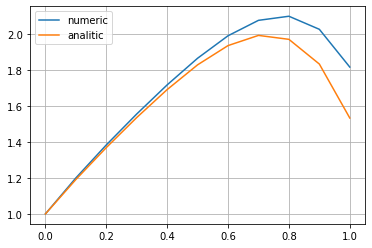

In [13]:
npts = 11
ts = np.linspace(0, 1, npts)
y0 = 1
f = lambda t, y: 2 - 2*t+4*t**2 - 4*t**3 - 4*t**4
ynumeric = eulerexplicit(f, y0, ts)
yanalitic = 1 + 2*ts - ts**2 + (4/3)*ts**3 - ts**4 - (4/5)*ts**5
plt.plot(ts, ynumeric, label="numeric")
plt.plot(ts, yanalitic, label="analitic")
plt.legend()
plt.grid()
plt.show()


### Exercicio 2

> $$y' = 1+\dfrac{1}{t}y$$
> $$1 \le t \le 2 \ \ \ \ \ \ y(1)=2$$
> 
> Solução analítica
>
> $$y(t) = t\cdot \ln t +2t$$

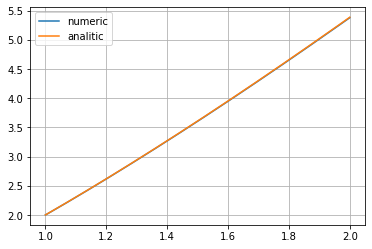

In [15]:
npts = 1029
ts = np.linspace(1, 2, npts)
y0 = 2
f = lambda t, y: 1 + y/t
ynumeric = eulerexplicit(f, y0, ts)
yanalitic = ts * np.log(ts) + 2*ts
plt.plot(ts, ynumeric, label="numeric")
plt.plot(ts, yanalitic, label="analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 3

> $$y' = t^2\cdot y$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0)=1$$
> 
> Solução analítica
>
> $$y(t) = \exp \left(\dfrac{t^3}{3}\right)$$

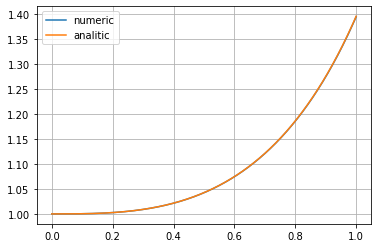

In [18]:
npts = 1029
ts = np.linspace(0, 1, npts)
y0 = 1
f = lambda t, y: y*t**2
ynumeric = eulerexplicit(f, y0, ts)
yanalitic = np.exp(ts**3/3)
plt.plot(ts, ynumeric, label="numeric")
plt.plot(ts, yanalitic, label="analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 4

> $$y' = t \cdot y^2$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0)=1$$
> 
> Solução analítica
>
> $$y(t) = \dfrac{2}{2-t^2}$$

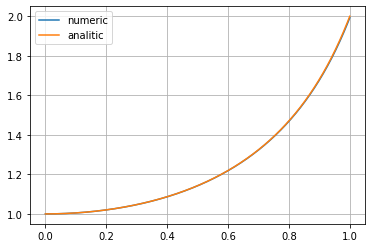

In [19]:
npts = 1029
ts = np.linspace(0, 1, npts)
y0 = 1
f = lambda t, y: t*y**2
ynumeric = eulerexplicit(f, y0, ts)
yanalitic = 2/(2-ts**2)
plt.plot(ts, ynumeric, label="numeric")
plt.plot(ts, yanalitic, label="analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 5

> $$y' = 1 + \dfrac{1}{2} \cdot y^2$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0)=0.5$$
> 
> Solução analítica
>
> $$y(t) = \sqrt{2} \cdot \tan \left(\dfrac{t}{\sqrt{2}}+\arctan \left(\dfrac{1}{2\sqrt{2}}\right)\right)$$

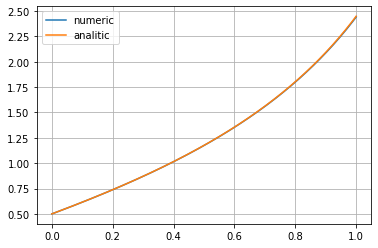

In [21]:
npts = 1029
ts = np.linspace(0, 1, npts)
y0 = 0.5
f = lambda t, y: 1 + (y**2)/2
ynumeric = eulerexplicit(f, y0, ts)
yanalitic = np.sqrt(2) * np.tan(ts/np.sqrt(2) + np.arctan(2**(-3/2)))
plt.plot(ts, ynumeric, label="numeric")
plt.plot(ts, yanalitic, label="analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 6

> Considere novamente a equação 
> 
> $$y=2-2t+4t^2-4t^3-4t^4$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0) = 1$$
> 
> Para um tempo fixo $t = 1$, faça um estudo do erro (módulo da diferença entre o valor $y$ calculado
e o valor exato) em função do valor do $\Delta t$ utilizado.
> Compare os resultados obtidos com os 4 métodos. Disserte.

### Exercicio 7

> O deslocamento angular $\theta(t)$, em radianos, de um pêndulo é dado por 
> 
> $$\dfrac{d^2\theta}{dt^2}+\dfrac{g}{L}\ \sin \theta = 0$$
>
> com
>
> * $\theta(0) = \theta_0$
> * $\theta'(0) = \theta_0'$
> * $g = 9.81\ \text{m}/\text{s}^2$, a aceleração gravitacional
> * $L$ o comprimento do pêndulo.
> 
> Para pequenos valores de $\theta$, essa equação pode ser simplificada para
> 
> $$\dfrac{d^2\theta}{dt^2} + \dfrac{g}{L}\cdot \theta = 0$$
> 
> Faça gráficos de $\theta$ em função de $t$, com um período de oscilação, para $\theta(0) = 0.1$ e $\theta(0) = 0.5$, $\theta'(0)=0$ e $L = 0.1$, $1.0$ e $10$ m.
> Utilize a equação exata e a simplificada. Compare os resultados

### Exercicio 8

> Em um circuito com tensão aplicada $\epsilon(t)$ e com resistência $R$, indutância $L$ e capacitância $C$ em paralelo, a corrente $i$ satisfaz a equação diferencial
> 
> $$\dfrac{di}{dt}=C\cdot \dfrac{d^2\epsilon}{dt^2}+\dfrac{1}{R}\cdot \dfrac{d\epsilon}{dt}+\dfrac{1}{L}\cdot \epsilon$$
>
> Suponha que $C = 0.3$ *farads*, $R = 1.4$ *ohm*, $L = 1.7$ *henrie* e que a tensão seja dada, em *Volts*,
por
>
> $$\epsilon(t) = \exp\left(-0.06\pi t\right)\cdot \sin \left(2t-\pi\right)$$
>
> Se $i(0) = 0$, encontre a corrente para $t$ entre $0$ e $10$ s.
> Resolva este problema usando o método de Euler Explícito e o método de Runge-Kutta de quarta ordem.
> Compare as soluções

### Exercicio 9

> O crescimento populacional de uma dada espécie pode ser modelado por uma EDO do tipo
> 
> $$\dfrac{dN}{dt} = aN - bN^2$$
> 
> em que
>
> * $N(0) = N_0$
> * $N$ é a população
> * $aN$ representa a taxa de nascimento
> * $bN^2$ representa a taxa de mortalidade causada por doenças e competição por alimentos.
> 
> Se
>  
> * $N_0 = 100000$
> * $a = 0.1$
> * $b = 10^{−7}$
> 
> calcule $N(t)$ para $t$ entre $0$ e $20$ anos.
> 
> Varie o coeficiente $b$ e veja como isso afeta no número de indivíduos.
> Resolva este problema usando o método de Euler Explícito e o método de Runge-Kutta de quarta ordem.
> Compare as soluções

### Exercicio 10

> As populações de duas espécies competindo pela mesma fonte de alimentação podem ser modeladas pelo par de EDOS
> 
> $$\dfrac{dN_1}{dt} = N_1\left(a_1 - b_1 N_1 - c_1 N_2\right)$$
> $$\dfrac{dN_2}{dt} = N_2\left(a_2 - b_2 N_2 - c_2 N_1\right)$$
> 
> Com
> 
> * $N_1(t=0) = N_{1,0}$
> * $N_2(t=0) = N_{2,0}$
> 
> Nessas equações
> 
> * $N_i$ é o número de indivíduos da espécie $i$
> * $a_iN_i$ representa a taxa de nascimento
> * $b_iN_i^2$ representa a taxa de mortalidade
> * $c_iN_iN_j representa a taxa de mortalidade devido à competição por alimentos.
> 
> Se
> 
> * $N_{1,0} = N_{2,0} = 10^5$
> * $a_1 = 0.1$, $b_1 = 8 \cdot 10^{-7}$ e $c_1 = 10^{−6}$
> * $a_2 = 0.1$, $b_2 = 8 \cdot 10^{−7}$ e $c_2 = 10^{−7}$
> 
> calcule $N_{1}(t)$ e $N_{2}(t)$ entre $0$ e $10$ anos